# TRABAJO PRÁCTICO 2 - Análisis numérico I [75.12]
### Facultad de ingeniería - Universidad de Buenos Aires
<br/>

## Descomposición de señales mediante series de Fourier a través de resolución de problema de cuadrados mínimos
<br/>

### Integrantes:
| Alumno             | Número de padrón | Email               |
|--------------------|------------------|---------------------|
| BOCACCIO, Agustina | 106393           | abocaccio@fi.uba.ar |
| SINGER, Joaquín    | 105854           | josinger@fi.uba.ar  |
| LAZZARO, Melina    | 105931           | mlazzaro@fi.uba.ar  |
<br/><br/>

#### $1^{er}$ cuatrimestre 2021
#### Curso 5 - Cátedra Sassano
#### Corrector: María Agustina Turano
#### Fecha de entrega: 21/07/2021

## 1. Forma general de la serie de Fourier de una señal cuadrada 

---



##### a) Defina matemáticamente la expresión de una señal cuadrada periódica de amplitud $\lbrace 1;−1 \rbrace $ volt, periodo T y *duty cycle* $Dc=50 %$. El *duty cycle* se define como $Dc= \frac{ \text{Duracion de la parte positiva de la señal}} { \text{Duracion total de la señal}}·100 %$

$$ f(t)
            \begin{cases}
            -1 & \text{si  } -\frac{T}{2} \leqslant x < 0\\
             1& \text{si  } 0 \leqslant x < \frac{T}{2}\\
            \end{cases}
$$

$ f(t) = f(t + T), \text{ siendo T el periodo de la funcion}$

##### b) Muestre detalladamente el desarrollo de la descomposición en serie de Fourier. Exprese los coeficientes $a_k$ y $b_k$ como números reales y defina el rango del índice $k$ adecuadamente.

El desarrollo de la descomposicion en serie de Fourier es: 
$f(t) = \frac{a_0}{2} + \
\sum_{k=1}^{\infty}(a_k \cdot cos(w_kt) + b_k \cdot sen(w_kt))
\ $

con $a_0= \begin{equation} \frac{2}{T} \int \limits_{-T/2}^{T/2} f(t) \cdot dt
\end{equation}
$

con $a_k= \begin{equation} \frac{2}{T} \int \limits_{-T/2}^{T/2} f(t) \cdot cos(w_kt) \cdot dt  \text{   (k= 0, 1, 2...)}  
\end{equation}
$

 y $ b_k= \begin{equation} \frac{2}{T} \int \limits_{-T/2}^{T/2} f(t) \cdot sen(w_kt)) \cdot dt  \text{   (k= 1, 2, 3...)} 
\end{equation}
$

siendo $w_k= \frac{2\pi k}{T}$ y T el periodo.



Resolvemos para la señal cuadrada:

 $a_0= \begin{equation} \frac{2}{T} \int \limits_{-T/2}^{T/2} f(t)\cdot dt = \frac{2}{T} (\int \limits_{-T/2}^{0} f(t)\cdot dt + \int \limits_{0}^{T/2} f(t)\cdot dt ) =  \frac{2}{T} (\int \limits_{-T/2}^{0}(-1)\cdot dt + \int \limits_{0}^{T/2} 1\cdot dt ) = -1 + 1 = 0
\end{equation}
$


 $a_k= \begin{equation} \frac{2}{T} \int \limits_{-T/2}^{T/2} f(t) \cdot cos(w_kt) \cdot dt =0 \Rightarrow 
\end{equation}
$
como coseno es una funcion par y la señal cuadrada que definimos es completamente impar, el desarrollo de la serie de Fourier para esta funcion no va a tener cosenos.


$ b_k= \begin{equation} \frac{2}{T} \int \limits_{-T/2}^{T/2} f(t) \cdot sen(w_kt) \cdot dt 
\end{equation}
$

$ b_k= \begin{equation} \frac{2}{T} (\int \limits_{-T/2}^{0} (-1) \cdot sen(w_kt) \cdot dt  + \int \limits_{0}^{T/2} sen(w_kt) \cdot dt )  
\end{equation}
$

$ b_k= \begin{equation} \frac{2}{Tw_k} ( (cos(w_kt)\Big|_{-T/2}^0 )+  (cos(w_kt)\Big|_0^{T/2} ) )  
\end{equation}
$

$ b_k= \begin{equation} \frac{2}{Tw_k} ( 2 -2cos(w_kt))  
\end{equation}
$

$ b_k= \begin{equation} \frac{4}{Tw_k} ( 1 -cos(w_kt))
\end{equation} 
$

teniendo en cuenta que $w_k=\frac{2\pi k}{T}$, obtenemos: 

$ b_k= \begin{equation} \frac{2}{k\pi} ( 1 -cos(k\pi))
\end{equation} 
$

Reemplazando $b_k$ y $w_k$ en la serie de Fourier nos queda: 

$f(t) =
\sum_{k=1}^{\infty} \frac{2}{k\pi} (1 -cos(k\pi)) \cdot sen(\frac{2k\pi}{T} t)
\ $ 


##### c) En términos numéricos, ¿por qué cree que es mejor utilizar una representación en serie de Fourier en vez de la señal cuadrada?

Una ventaja es que obtenemos una función continua. Además nos permite analizar una señal periódica en términos de su contenido frecuencial o espectro permitiéndonos establecer una dualidad entre tiempo y frecuencia, de forma que, operaciones realizadas en el dominio temporal tienen su dual en el dominio frecuencial.

## 2. Determinación  de  coeficientes  de  Fourier  por  ajuste  de funciones


---



###La señal cuadrada se puede expresar como una serie de Fourier de la siguiente manera

$$
x(t) = a_{0} + \sum_{k=1}^{+ \infty} a_{k} \cdot \sin{(k\omega_{0}t)} + \sum_{k=1}^{+ \infty} b_{k} \cdot \cos{(k\omega_{0}t)} \quad \textrm{con} \quad \omega_{0} = \frac{2\pi}{T}
$$

###Dado que no es posible evaluar los infinitos términos de la descomposición, se requiere encontrar los coeficientes de la serie de Fourier utilizando una aproximación por cuadrados mínimos. Se solicita:

#####a) si la cantidad máxima de términos a computar es $k_{max}$, determine la expresión de la función de ajuste $s(t)$ a utilizar.

La expresion de funcion de ajuste $s(t)$ a utilizar sera: 

$$
s(t) = a_{0} + \sum_{k=1}^{k_{max}} a_{k} \cdot \sin{(k\omega_{0}t)} + \sum_{k=1}^{k_{max}} b_{k} \cdot \cos{(k\omega_{0}t)} \quad \textrm{con} \quad \omega_{0} = \frac{2\pi}{T}
$$


#####b) desarrolle y detalle el procedimiento que lleva a la formulación de las ecuaciones normales para resolver el problema de cuadrados mínimos planteado.

Queremos resolver el problema de hallar los coeficientes de la serie de Fourier $(a_k, b_k)$ con $0\leq k \leq k_{max}$ mediante cuadrados minimos.
Para eso usamos la funcion de ajuste $s(t)$ y vamos a necesitar muestras de la funcion, esto es un conjunto de puntos $(t_n, f(t_n))$ para hallar la funcion $s(t)$ que mejor ajuste esos puntos. 
El sistema de ecuaciones que se puede plantear, con $k_{max}$ terminos a computar y $n$ muestras de la funcion es: 

$$ 
            \begin{cases}
            a_0 + \sum_{k=1}^{k_{max}}a_k \cdot sen(kw_0t_1)+\sum_{k=1}^{k_{max}}b_k \cdot cos(kw_0t_1) = f(t_1)\\
            a_0 + \sum_{k=1}^{k_{max}}a_k \cdot sen(kw_0t_2)+\sum_{k=1}^{k_{max}}b_k \cdot cos(kw_0t_2) = f(t_2)\\
            .... \\
             a_0 + \sum_{k=1}^{k_{max}}a_k \cdot sen(kw_0t_n)+\sum_{k=1}^{k_{max}}b_k \cdot cos(kw_0t_n) = f(t_n)\\
            \end{cases}
$$

<br/><br/>
Ademas, como la señal que estamos analizando cumple con el Dc de 50%, el termino medio va a ser 0, por lo que el termino $a_0$ vale 0 y el sistema de ecuaciones va a quedar de la siguiente manera:


$$ 
            \begin{cases}
            \sum_{k=1}^{k_{max}}a_k \cdot sen(kw_0t_1)+\sum_{k=1}^{k_{max}}b_k \cdot cos(kw_0t_1) = f(t_1)\\
            \sum_{k=1}^{k_{max}}a_k \cdot sen(kw_0t_2)+\sum_{k=1}^{k_{max}}b_k \cdot cos(kw_0t_2) = f(t_2)\\
            .... \\
             \sum_{k=1}^{k_{max}}a_k \cdot sen(kw_0t_n)+\sum_{k=1}^{k_{max}}b_k \cdot cos(kw_0t_n) = f(t_n)\\
            \end{cases}
$$

<br/><br/>
Este problema se puede plantear de forma matricial de la siguiente manera: 


\begin{equation}
  \begin{pmatrix}
    sen(1w_0t_1) & ... &sen(k_{max}w_0t_1)& cos(1w_0t_1) & ... & cos(k_{max}w_0t_1)\\
     sen(1w_0t_2) & ... &sen(k_{max}w_0t_2)& cos(1w_0t_2) & ... & cos(k_{max}w_0t_2)\\
    ...\\
    sen(1w_0t_n) & ... &sen(k_{max}w_0t_n)& cos(1w_0t_n) & ... & cos(k_{max}w_0t_n)\\
    \end{pmatrix}
     \cdot 
    \begin{pmatrix}
    a1\\
    ...\\
    a_{k_{max}} \\
    b_1\\
    ...\\
    b_{k_{max}}
    \end{pmatrix}
    =
    \begin{pmatrix}
    f(t_1)\\
    ...\\
    f(t_n)\\
    \end{pmatrix}
\end{equation}

Llamaremos a esta ecuacion matricial $Ax=b$. 

<br/>
Esta ecuacion en general no tendra solucion, por lo que se usara el metodo de cuadrados minimos para hallar la solucion con el minimo error ($\hat{x}$).

El metodo trata de hallar el vector $\hat{x}$ que mejor aproxime el sistema planteado arriba. Es decir, tratamos de minimizar la norma del error 
$E= ||b-A\hat{x}||$, para ello se puede plantear un vector residual $r=A\hat{x}-b$, y como buscamos que el error sea lo mas cercano a la solucion real, queremos que sea ortogonal al subespacio que forma $col(A)$, es decir $A^T \cdot r =0 $. Esto es porque la proyeccion ortogonal asegura la minima distancia posible al subespacio en cuestion. Asi tenemos: 

$\begin{equation} 
A^T \cdot r =0 \\
A^T \cdot (b-A\hat{x}) =0 \\
A^T \cdot b - A^T \cdot A\hat{x} =0 \\
A^T \cdot A\hat{x} = A^T \cdot b 
\end{equation}$ 

Esta ultima ecuacion se llama _ecuacion normal de Gauss_.


#####c) dado que se tiene un problema de aproximación, exprese matemáticamente la relación que debe cumplir la cantidad de muestras a tomar de la función a aproximar.

Las incognitas del sistema van a ser los coeficientes de la serie de Fourier, por lo que si tenemos k terminos a computar, la cantidad de constantes a encontrar van a ser, *como minimo*,  $2k_{max} $. Para que el sistema tenga solucion, es preciso que la cantidad de ecuaciones sea igual o mayor a la cantidad de incognitas a hallar (porque el rango de $A^tA$)=rg($A$) y el rg($A^tA$) tiene que ser a lo sumo igual que las incógnitas) Por este motivo, vamos a necesitar  $2k_{max} $ o mas muestras $\lbrace t_n, f(t_n) \rbrace $. 

Por ejemplo, si $k_{max}$ es 3, la cantidad de muestras necesarias van a ser $2 \cdot 3 = 6$

#####d) muestre la forma que debe tener el sistema a resolver y la función $s(t)$ para $k_{max} = 1,3,144$.

En nuestro problema, aplicando el metodo de minimos cuadrados para resolver el sistema de ecuaciones planteado en el ejercicio 2 b), podemos encontrar la solucion de la siguiente manera: 
<br/><br/>
\begin{equation}
  \begin{pmatrix}
    sen(1w_0t_1) & sen(1w_0t_2) & ... & sen(k_{max}w_0t_n) \\
    ...\\
    sen(k_{max}w_0t_1) & sen(k_{max}w_0t_2)&... & sen(k_{max}w_0t_n)\\
    cos(1w_0t_1) & cos(1w_0t_2) & ... & cos(1w_0t_n)\\ 
    ...\\
    cos(k_{max}w_0t_1) & cos(k_{max}w_0t_2) & ... & cos(k_{max}w_0t_n)\\ 
    \end{pmatrix}
     \cdot 
     \begin{pmatrix}
      sen(1w_0t_1) & ... &sen(k_{max}w_0t_1)& cos(1w_0t_1) & ... & cos(k_{max}w_0t_1)\\
     sen(1w_0t_1) & ... &sen(k_{max}w_0t_2)& cos(1w_0t_2) & ... & cos(k_{max}w_0t_2)\\
    ...\\
    sen(1w_0t_n) & ... &sen(k_{max}w_0t_n)& cos(1w_0t_n) & ... & cos(k_{max}w_0t_n)\\
    \end{pmatrix}
    \begin{pmatrix}
    \hat{a1}\\
    ...\\
    \hat{a_{k_{max}}} \\
    \hat{b_1}\\
    ...\\
    \hat{b_{k_{max}}}
    \end{pmatrix}
    =
    \begin{pmatrix}
    sen(1w_0t_1) & sen(1w_0t_2) & ... & sen(k_{max}w_0t_n) \\
    ...\\
    sen(k_{max}w_0t_1) & sen(k_{max}w_0t_2)&... & sen(k_{max}w_0t_n)\\
    cos(1w_0t_1) & cos(1w_0t_2) & ... & cos(1w_0t_n)\\ 
    ...\\
    cos(k_{max}w_0t_1) & cos(k_{max}w_0t_2) & ... & cos(k_{max}w_0t_n)\\ 
    \end{pmatrix}
    \cdot
     \begin{pmatrix}
    f(t_1)\\
    ...\\
    f(t_n)\\
    \end{pmatrix}
\end{equation}
<br/><br/>
**Planteamos las ecuaciones para los diferentes k con n muestras:**



*  **k = 1**

$$
s_1(t) = a_{1} \cdot \sin{(1\omega_{0}t)} +  b_{1} \cdot \cos{(1\omega_{0}t)} \quad \textrm{con} \quad \omega_{0} = \frac{2\pi}{T}
$$

la cantidad de incognitas y por lo tanto tambien de muestras necesarias seran $2 \cdot 1$= 2, y se puede plantear con el sistema:

$$
            \begin{cases}
            a_1 \cdot sen(1w_0t_1)+ b_1 \cdot cos(1w_0t_1) = f(t_1)\\
            a_1 \cdot sen(1w_0t_2)+b_1 \cdot cos(1w_0t_2) = f(t_2)\\
            \end{cases}
$$

expresado de forma matricial: 

\begin{equation}
  \begin{pmatrix}
    sen(1w_0t_1) & cos(1w_0t_1) \\
    sen(1w_0t_2) & cos(1w_0t_2) )\\
    \end{pmatrix}
     \cdot 
    \begin{pmatrix}
    a1\\
    b_1\\
    \end{pmatrix}
    =
    \begin{pmatrix}
    f(t_1)\\
    f(t_2)\\
    \end{pmatrix}
\end{equation}

y la ecuacion a resolver sera: 
\begin{equation}
  \begin{pmatrix}
    sen(1w_0t_1) & sen(1w_0t_2) &  sen(1w_0t_3)\\
    cos(1w_0t_1)  & cos(1w_0t_2) &  cos(1w_0t_3)  \\
    \end{pmatrix}
    \cdot 
     \begin{pmatrix}
    sen(1w_0t_1) & cos(1w_0t_1) \\
    sen(1w_0t_2) & cos(1w_0t_2) )\\
    sen(1w_0t_3) & cos(1w_0t_3) \\
    \end{pmatrix}
     \cdot 
    \begin{pmatrix}
    \hat{a1}\\
    \hat{b_1}\\
    \end{pmatrix}
    =
     \begin{pmatrix}
    sen(1w_0t_1) & sen(1w_0t_2) & sen(1w_0t_3)\\
    cos(1w_0t_1)  & cos(1w_0t_2) & cos(1w_0t_3)  \\
    \end{pmatrix}
    \cdot 
    \begin{pmatrix}
    f(t_1)\\
    f(t_2)\\
    \end{pmatrix}
\end{equation}




* **k = 3**

$$
s(t) = \sum_{k=1}^{3} a_{k} \cdot \sin{(k\omega_{0}t)} + \sum_{k=1}^{3} b_{k} \cdot \cos{(k\omega_{0}t)} \quad \textrm{con} \quad \omega_{0} = \frac{2\pi}{T}
$$

la cantidad de incognitas y por lo tanto tambien de muestras necesarias seran $2 \cdot 3=6$ , y se puede plantear con el sistema:

\begin{equation}
  \begin{pmatrix}
    sen(1w_0t_1) & sen(2w_0t_1) &sen(3w_0t_1)& cos(1w_0t_1) & cos(2w_0t_1) & cos(3w_0t_1)\\
     sen(1w_0t_2) & sen(2w_0t_2) &sen(3w_0t_2)& cos(1w_0t_2) & cos(2w_0t_2) & cos(3w_0t_2)\\
    ...\\
     sen(1w_0t_6) & sen(2w_0t_6) &sen(3w_0t_6)& cos(1w_0t_6) & cos(2w_0t_6) & cos(3w_0t_6)\\
    \end{pmatrix}
     \cdot 
    \begin{pmatrix}
    a1\\
    a_2\\
    a_3 \\
    b_1\\
    b_2\\
    b_3
    \end{pmatrix}
    =
    \begin{pmatrix}
    f(t_1)\\
    ...\\
    f(t_6)\\
    \end{pmatrix}
\end{equation}

y el sistema a resolver será: 
<br/><br/>
\begin{equation}
  \begin{pmatrix}
    sen(1w_0t_1) & ... & sen(1w_0t_6)\\
    sen(2w_0t_1) & ... & sen(2w_0t_6) \\ 
    sen(3w_0t_1) & ... & sen(3w_0t_6) \\ 
    cos(1w_0t_1) & ... & cos(1w_0t_6)  \\
    cos(2w_0t_1) & ... & cos(2w_0t_6)  \\
    cos(3w_0t_1) & ... & cos(3w_0t_6)  \\
    \end{pmatrix}
    \cdot 
     \begin{pmatrix}
    sen(1w_0t_1) & sen(2w_0t_1) &sen(3w_0t_1)& cos(1w_0t_1) & cos(2w_0t_1) & cos(3w_0t_1)\\
     sen(1w_0t_2) & sen(2w_0t_2) &sen(3w_0t_2)& cos(1w_0t_2) & cos(2w_0t_2) & cos(3w_0t_2)\\
    ...\\
     sen(1w_0t_6) & sen(2w_0t_6) &sen(3w_0t_6)& cos(1w_0t_6) & cos(2w_0t_6) & cos(3w_0t_6)\\
    \end{pmatrix}
     \cdot 
    \cdot 
    \begin{pmatrix}
    \hat{a1}\\
    \hat{a2}\\
    \hat{a3}\\
    \hat{b_1}\\
    \hat{b_2}\\
    \hat{b_3}\\
    \end{pmatrix}
    =
    \begin{pmatrix}
    sen(1w_0t_1) & ... & sen(1w_0t_6)\\
    sen(2w_0t_1) & ... & sen(2w_0t_6) \\ 
    sen(3w_0t_1) & ... & sen(3w_0t_6) \\ 
    cos(1w_0t_1) & ... & cos(1w_0t_6)  \\
    cos(2w_0t_1) & ... & cos(2w_0t_6)  \\
    cos(3w_0t_1) & ... & cos(3w_0t_6)  \\
    \end{pmatrix}
    \begin{pmatrix}
    f(t_1)\\
    ...\\
    f(t_6)\\
    \end{pmatrix}
\end{equation}

* **k = 144**

$$
s(t) = a_{0} + \sum_{k=1}^{144} a_{k} \cdot \sin{(k\omega_{0}t)} + \sum_{k=1}^{144} b_{k} \cdot \cos{(k\omega_{0}t)} \quad \textrm{con} \quad \omega_{0} = \frac{2\pi}{T}
$$

la cantidad de incógnitas y por lo tanto tambien de muestras necesarias seran $2 \cdot 144 +1 =245 $, y se puede plantear con el sistema: 

\begin{equation}
  \begin{pmatrix}
    sen(1w_0t_1) & ... &sen(144w_0t_1)& cos(1w_0t_1) & ... & cos(144w_0t_1)\\
    sen(1w_0t_2) & ... &sen(144w_0t_2)& cos(1w_0t_2) &  ... & cos(144w_0t_2)\\
    ...\\
     sen(1w_0t_{288}) & ... &sen(144w_0t_{288})& cos(1w_0t_{288}) & ... & cos(144w_0t_{288})\\
    \end{pmatrix}
     \cdot 
    \begin{pmatrix}
    a1\\
    ...\\
    a_{144} \\
    b_1\\
    ...\\
    b_{144}
    \end{pmatrix}
    =
    \begin{pmatrix}
    f(t_1)\\
    ...\\
    f(t_{288})\\
    \end{pmatrix}
\end{equation}

y el sistema a resolver será: 
<br/><br/>
\begin{equation}
  \begin{pmatrix}
    sen(1w_0t_1) & ... & sen(1w_0t_{288})\\
    ... \\ 
    sen(144w_0t_1) & ... & sen(144w_0t_{288}) \\ 
    cos(1w_0t_1) & ... & cos(1w_0t_{288})  \\
    ...\\
    cos(144w_0t_1) & ... & cos(144w_0t_{288})  \\
    \end{pmatrix}
    \cdot 
     \begin{pmatrix}
    sen(1w_0t_1) & ... &sen(144w_0t_1)& cos(1w_0t_1) & ... & cos(144w_0t_1)\\
     sen(1w_0t_2) & ... &sen(144w_0t_2)& cos(1w_0t_2) &  ... & cos(144w_0t_2)\\
    ...\\
     sen(1w_0t_{288}) & ... &sen(144w_0t_{288})& cos(1w_0t_{288}) & ... & cos(144w_0t_{288})\\
    \end{pmatrix}
    \cdot 
    \begin{pmatrix}
    \hat{a1}\\
    ...\\
    \hat{a_{144}}\\
    \hat{b_1}\\
    ...\\
    \hat{b_{144}}\\
    \end{pmatrix}
    =
    \begin{pmatrix}
    sen(1w_0t_1) & ... & sen(1w_0t_{288})\\
    ... \\ 
    sen(144w_0t_1) & ... & sen(144w_0t_{288}) \\ 
    cos(1w_0t_1) & ... & cos(1w_0t_{288})  \\
    ...\\
    cos(144w_0t_1) & ... & cos(144w_0t_{288})  \\
    \end{pmatrix}
    \cdot 
    \begin{pmatrix}
    f(t_1)\\
    ...\\
    f(t_{288})\\
    \end{pmatrix}
\end{equation}

## 3. Resolución mediante eliminación gaussiana con pivoteo parcial


---

#####a) Describa en no más de 1 página el método de eliminación gaussiana con pivoteo parcial.

El método de eliminación gaussiana consiste en resolver un sistema de ecuaciones en forma matricial mediante transformaciones elementales obteniendo una matriz triangular superior, que se puede resolver facilmente reemplazando progresivamente el valor de cada variable.
El pivoteo parcial es una técnica que busca minimizar el error cometido al realizar estas transformaciones elementales, divididendo siempre con el mayor numerador. Para esto, identificamos la fila con el término de mayor magnitud en la columna de interés y la intercambiamos para luego aplicar la eliminación gaussiana.
Los pasos a seguir son los siguientes:
1. Identificar la fila con el mayor coeficiente en la primera columna, intercambiarla por la primera fila de ser necesario.
2. Para la fila que ahora está en la posición 2, obtener un coeficiente $m_{21}=\frac{a_{21}}{a_{11}}$. Obtener los m para las demás columnas, siempre dividiendo por el $a_{11}$.
3. A cada fila restarle la fila 1 multiplicada por su respectivo coeficiente $m$.
4. Se obtiene una matriz con ceros en su primera columna excepto en $a_{11}$. Buscar ahora el mayor coeficiente de la segunda columna y repetir los pasos hasta obtener una matriz triangular superior.

#####b) Implementar en Python3 la resolución del sistema de ecuaciones planteado para un $k_{max}$ genérico utilizando el método de Gauss con pivoteo parcial.

In [ ]:
import numpy as np

def gauss_pivoteo_parcial(matriz_aumentada):

  if (len(matriz_aumentada)+1 != len(matriz_aumentada[0])):
    print("Error")
    return None
  
  for i in range(0, len(matriz_aumentada)-1):
    mayor = 0
    
    for j in range(i, len(matriz_aumentada)):
      if (abs(matriz_aumentada[j,i]) >= mayor):
        mayor = abs(matriz_aumentada[j,i])
        filamayor = j
    
    if (mayor < 1e-14):
      print("Error")
      return None

    matriz_aumentada[[i, filamayor]] = matriz_aumentada[[filamayor, i]]
    
    for j in range(i+1, len(matriz_aumentada)):
      multiplicador = matriz_aumentada[j,i]/matriz_aumentada[i,i]
      for k in range(i, len(matriz_aumentada)+1):
        matriz_aumentada[j,k] = matriz_aumentada[j,k] - (multiplicador * matriz_aumentada[i,k])
  x = np.zeros(len(matriz_aumentada))
  x[len(matriz_aumentada)-1] = matriz_aumentada[len(matriz_aumentada)-1,len(matriz_aumentada)]/matriz_aumentada[len(matriz_aumentada)-1,len(matriz_aumentada)-1]

  for i in range(len(matriz_aumentada)-2, -1, -1):
    x[i] = matriz_aumentada[i,len(matriz_aumentada)]
    for j in range(i+1, len(matriz_aumentada)-1):
      x[i] = x[i] - matriz_aumentada[i,j]*x[j]
    x[i] = x[i]/matriz_aumentada[i,i]
      

  return x

#####c) Con el algoritmo implementado, calcular los coeficientes de Fourier para cada $k_{max} = \lbrace1,3,13,34,55,144\rbrace$. Tome 432 muestras de la función cuadrada y un periodo de 1ms. No hace falta mostrar los valores.

In [ ]:
import numpy as np

T = 1
MUESTRAS = 432


#para valores entre 0 y T
def f(x):
  if (0 <= x < T/2):
    return 1 
  return -1


def generar_sistema(k):
  
  w = (np.pi*2/T)
  t =  np.linspace(0, T, MUESTRAS)
  matriz = np.zeros((2*k, MUESTRAS), dtype=float)

  for i in range(0,k):
    for j in range(0, MUESTRAS):
      matriz[i,j] = np.sin((i+1)*w*t[j])
      matriz[k+i,j] = np.cos((i+1)*w*t[j])

  matriz_t = matriz.T
  A = np.dot(matriz, matriz_t)

  fs = np.zeros(MUESTRAS, dtype=float)
  for i in range(0, MUESTRAS):
    fs[i] = f(t[i])
  
  b = np.dot(matriz, fs)

  return A,b


def obtener_coeficientes_de_fourier_pivoteo(k):
  A, b = generar_sistema(k)
  matriz_aumentada = np.column_stack((A, b))

  return gauss_pivoteo_parcial(matriz_aumentada)


X_1 = obtener_coeficientes_de_fourier_pivoteo(1)
X_2 = obtener_coeficientes_de_fourier_pivoteo(3)
X_3 = obtener_coeficientes_de_fourier_pivoteo(13)
X_4 = obtener_coeficientes_de_fourier_pivoteo(34)
X_5 = obtener_coeficientes_de_fourier_pivoteo(55)
X_6 = obtener_coeficientes_de_fourier_pivoteo(144)

#####d) Graficar 1000 muestras de un periodo de la señal cuadrada ideal superpuesta con las curvas obtenidas para cada $k_{max}$ utilizando la serie de Fourier correspondiente.

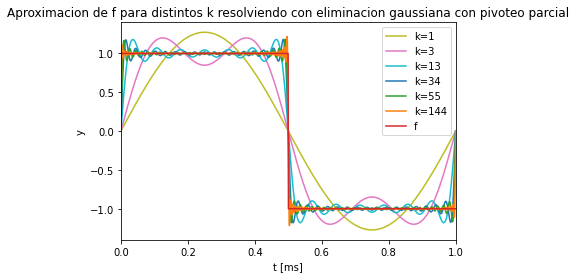

In [ ]:
import matplotlib.pyplot as plt

n = 1000
ts = np.linspace(0, T, n)


# x es el vector con los coeficientes b_k y a_k
# dado un t devuelve el y que le corresponda
def fourier(t, k, x):
  w = (2*np.pi/T)
  return sum([x[i]*np.sin((i+1)*w*t) + x[i+k]*np.cos((i+1)*w*t) for i in range(0,k)])


def graficar_aproximacion(k, coeficientes, un_color):
  
  X = np.zeros(n)
  for i in range(0, n):
    X[i] = fourier(ts[i], k, coeficientes)

  etiqueta = ('k='+str(k))
  plt.plot(ts, X, label=etiqueta, color=un_color)

graficar_aproximacion(1, X_1, 'C8')
graficar_aproximacion(3, X_2, 'C6')
graficar_aproximacion(13, X_3, 'C9')
graficar_aproximacion(34, X_4, 'C0')
graficar_aproximacion(55, X_5, 'C2')
graficar_aproximacion(144, X_6, 'C1')

X = np.zeros(n)
for i in range(0, n):
  X[i] = f(ts[i])

plt.plot(ts, X, label='f', color='C3')

plt.xlim([0, T])
plt.title('Aproximacion de f para distintos k resolviendo con eliminacion gaussiana con pivoteo parcial')
plt.xlabel('t [ms]')
plt.ylabel('y')
#plt.grid()
plt.legend()
plt.show()

#####e) ¿Cuántos valores de k cree que son necesarios para representar en forma exacta a la función cuadrada? ¿Por qué?

De acuerdo al teorema de Fourier, se necesita k infinito para representar de forma exacta una función. Sin embargo, al ser la señal cuadrada una funcion con discontinuidades, a medida que se van sumando terminos a la serie, los picos que se producen cerca de los puntos donde hay saltos no disminuyen, por lo que podemos llegar a una buena aproximacion de la funcion pero nunca llegariamos a tener la forma exacta de la señal cuadrada.

## 4. Resolución mediante el método iterativo de Gauss-Seidel


---

#####a) Describa en no más de 1 página el método iterativo de Gauss-Seidel.

El método de Gauss-Seidel es un método iterativo para resolver sistemas de ecuaciones compatibles $Ax=b$ iterando a partir de un vector $X^{(0)}$ aproximado. Reemplazamos en la primera ecuación despejando $x_1$. En la siguiente ecuación despejamos $x_2$ a partir de $X^{(0)}$ y el $x_1$ obtenido en el paso anterior. De la misma manera seguimos despejando hasta $x_n$, obteniendo así un vector $X^{(1)}$ y repetimos el procedimiento tantas veces como sea necesario hasta obtener un error tan chico como se desee. 

Despejando $x_i$ en una iteración $X^k$:


$x_i^k=\frac{b_i-\sum_{j=1}^{i-1}a_{ij}x_j^k-\sum_{j=i+1}^{n}a_{ij}x_j^{k-1}}{a_{ii}}$

#####b) Implementar en Python3 la resolución del sistema de ecuaciones planteado para un $k_{max}$ genérico utilizando el método de Gauss-Seidel.

In [ ]:
def gauss_seidel(A, b, x0, tolerancia, max_iteraciones):

  dimension = A.shape
  if (dimension[0] != dimension[1]) or (dimension[0] != x0.size) or (dimension[0] != b.size):
    print('Error: sistema no compatible')
    return None
    
  for i in range(0, dimension[0]):
    if abs(A[i,i]) < tolerancia:
      print('Error: los coeficientes en la diagonal de A no pueden ser nulos')
      return None

  x_k = np.copy(x0)
  k=0
  error_relativo = tolerancia+1
  while (k < max_iteraciones) and (error_relativo >= tolerancia):
      
    x_k_menosuno = np.copy(x_k)
        
    for i in range(dimension[0]):
      suma_k = sum(np.dot(A[i,j], x_k[j]) for j in range(i))
      suma_k_menosuno = sum(np.dot(A[i,j], x_k_menosuno[j]) for j in range(i+1, dimension[0]))
      x_k[i] = (b[i] - suma_k - suma_k_menosuno) / A[i,i]
   
    error_relativo = np.linalg.norm(x_k - x_k_menosuno, ord=np.inf)/ np.linalg.norm(x_k, ord=np.inf)
    k=k+1

  if (k >= max_iteraciones):
    print('Error: maxima cantidad de iteraciones alcanzada')   
            
  return x_k

#####c) Con el algoritmo implementado, calcular los coeficientes de Fourier para cada $k_{max}$ = {1,3,13,34,55,144}. Tome 432 muestras de la función cuadrada y un periodo de 1ms. No hace falta mostrar los valores. Utilice una tolerancia máxima relativa de 0,1%, utilizando como medida de distancia la norma infinito. Detenga el algoritmo con un mensaje de error si la cantidad de iteraciones es mayor a 500. Respecto al vector solución inicial estimado, puede asumirlo como cero.

In [ ]:
T = 1
MUESTRAS = 432
TOLERANCIA = 0.001
MAX_ITERACIONES = 500


#para valores entre 0 y T
def f(x):
  if (0 <= x < T/2):
    return 1 
  return -1


def generar_sistema(k):
  
  w = (np.pi*2/T)
  t =  np.linspace(0, T, MUESTRAS)
  matriz = np.zeros((2*k, MUESTRAS), dtype=float)

  for i in range(0,k):
    for j in range(0, MUESTRAS):
      matriz[i,j] = np.sin((i+1)*w*t[j])
      matriz[k+i,j] = np.cos((i+1)*w*t[j])

  matriz_t = matriz.T
  A = np.dot(matriz, matriz_t)

  fs = np.zeros(MUESTRAS, dtype=float)
  for i in range(0, MUESTRAS):
    fs[i] = f(t[i])
  
  b = np.dot(matriz, fs)

  return A,b


def obtener_coeficientes_de_fourier_seidel(k):
  A, b = generar_sistema(k)
  x0 = np.zeros(2*k)

  return gauss_seidel(A, b, x0, TOLERANCIA, MAX_ITERACIONES)


X_1 = obtener_coeficientes_de_fourier_seidel(1)
X_2 = obtener_coeficientes_de_fourier_seidel(3)
X_3 = obtener_coeficientes_de_fourier_seidel(13)
X_4 = obtener_coeficientes_de_fourier_seidel(34)
X_5 = obtener_coeficientes_de_fourier_seidel(55)
X_6 = obtener_coeficientes_de_fourier_seidel(144)

#####d) Graficar 1000 muestras de un periodo de la señal cuadrada ideal superpuesta con las curvas obtenidas para cada kmax utilizando la serie de Fourier correspondiente.

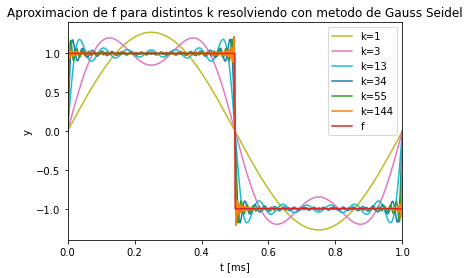

In [ ]:
import matplotlib.pyplot as plt

n = 1000
ts = np.linspace(0, T, n)


# x es el vector con los coeficientes b_k y a_k
# dado un t devuelve el y que le corresponda
def fourier(t, k, x):
  w = (2*np.pi/T)
  return sum([x[i]*np.sin((i+1)*w*t) + x[i+k]*np.cos((i+1)*w*t) for i in range(0,k)])


def graficar_aproximacion(k, coeficientes, un_color):
  
  X = np.zeros(n)
  for i in range(0, n):
    X[i] = fourier(ts[i], k, coeficientes)

  etiqueta = ('k='+str(k))
  plt.plot(ts, X, label=etiqueta, color=un_color)

graficar_aproximacion(1, X_1, 'C8')
graficar_aproximacion(3, X_2, 'C6')
graficar_aproximacion(13, X_3, 'C9')
graficar_aproximacion(34, X_4, 'C0')
graficar_aproximacion(55, X_5, 'C2')
graficar_aproximacion(144, X_6, 'C1')

X = np.zeros(n)
for i in range(0, n):
  X[i] = f(ts[i])

plt.plot(ts, X, label='f', color='C3')

plt.xlim([0, T])
plt.title('Aproximacion de f para distintos k resolviendo con metodo de Gauss Seidel')
plt.xlabel('t [ms]')
plt.ylabel('y')
#plt.grid()
plt.legend()
plt.show()

##5. Comparación entre métodos de solución utilizados


---

#####a) Crear una tabla donde para cada $k_{max}$ se calcule el error de coeficientes ∆ obtenidos con los dos métodos programados. Para ello utilizar la siguiente propuesta de error: se definen $a_G \in \Re^{1 \times 2k{max}} $ y $b_G \in \Re^{1 \times 2k{max}}$ como los vectores
con los coeficientes obtenidos utilizando la eliminación de Gauss con pivoteo
parcial. De la misma manera, $a_{GS} \in \Re^{1 \times 2k{max}} $ y $b_{GS} \in \Re^{1 \times 2k{max}}$, son los vectores con los coeficientes obtenidos a través del método de Gauss-Seidel. Por lo tanto se definen los vectores $c_G =[a_G b_G]$ y $c_{GS} = [a_{GS} b_{GS}]$. <br/>
Una forma útil de estudiar globalmente la diferencia entre los dos métodos es
calculando $∆ = ||c_G-c_{GS} ||$ para cada $k_{max}$ elegido. O sea, se está computando la distancia entre las dos representaciones (algo asi como el “error”).

In [ ]:
def mostrar_distancia(k):
  c_gs = obtener_coeficientes_de_fourier_seidel(k)
  c_g = obtener_coeficientes_de_fourier_pivoteo(k)
  print(str(k)+'\t', end='')
  print(np.linalg.norm(c_g - c_gs, ord=np.inf))


def imprimir_tabla_distancia():
  print('k   | distancia  ') 
  mostrar_distancia(1)
  mostrar_distancia(3)
  mostrar_distancia(13)
  mostrar_distancia(34)
  mostrar_distancia(55)
  mostrar_distancia(144)

imprimir_tabla_distancia()


k   | distancia  
1	0.0
3	2.4488780217061342e-18
13	5.551115123125783e-17
34	5.551115123125783e-17
55	5.551115123125783e-17
144	9.71445146547012e-17


#####b) Para cada $k_{max}$, calcular el error cuadrático global al utilizar el método de Gauss-Seidel, definido como $\varepsilon=||x-s||=\sqrt{\sum_{j=1}^{m}[x(t_j)-s(t_j)]^2}$ . Luego, graficar dichos errores en un gráfico $\varepsilon$ vs $k_{max}$.

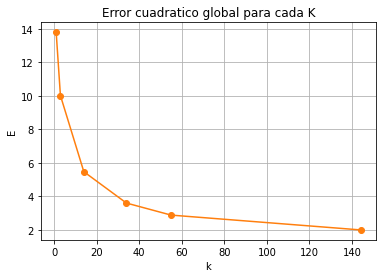

In [ ]:
m = 1000
ts = np.linspace(0, T, n)


def muestras_aproximacion_de_furier_seidel(k):
  S = np.zeros(m)
  
  coeficientes = obtener_coeficientes_de_fourier_seidel(k)
  for i in range(m):
    S[i] = fourier(ts[i], k, coeficientes)

  return S


def error_cuadratico_global_seidel(k):
  S = muestras_aproximacion_de_furier_seidel(k)
  X = np.zeros(n)
  for i in range(0, n):
    X[i] = f(ts[i])
  return np.linalg.norm(X - S)


k = np.array([1, 3, 14, 34, 55, 144])
E = np.zeros(6)

for i in range(np.size(E)):
  E[i] = error_cuadratico_global_seidel(k[i])

plt.plot(k, E, color='C1', marker='o')
plt.title('Error cuadratico global para cada K')
plt.xlabel('k')
plt.ylabel('E')
plt.grid()
plt.show()

#####c) Crear una tabla donde para cada $k_{max}$ se muestre: a) el número de condición del sistema a resolver, es decir, el del problema de cuadrados mínimos; b) la norma infinito de la matriz del método de Gauss-Seidel; c) el radio espectral de la matriz del método de Gauss-Seidel. ¿Qué observaciones y conclusiones puede hacer? Se recomienda repasar la clase teórica sobre el tema.

In [ ]:
def descomposicion_seidel(A, b):
  dimension = A.shape
  D = np.zeros(shape=dimension, dtype=float)
  L = np.zeros(shape=dimension, dtype=float)
  U = np.zeros(shape=dimension, dtype=float)

  for i in range(dimension[0]):
    for j in range(dimension[1]):
      if (j==i):
        D[i,j] = A[i,j]
      elif (i > j):
        L[i,j] = (-1)*A[i,j]
      elif (j > i):
        U[i,j] = (-1)*A[i,j]

  D_inv = np.linalg.inv(D)
  T = np.dot(D_inv, L+U)
  C = np.dot(D_inv, b)

  return T, C             


def numero_de_condicion(T):
  T_inv = np.linalg.inv(T)
  return np.dot(np.linalg.norm(T, ord=np.inf), np.linalg.norm(T_inv, ord=np.inf))


#Los metodos convergen a la unica solucion si el radio espectral es menor a 1
def radio_espectral(T):
  autovalores = np.abs(np.linalg.eigvals(T))
  return max(autovalores) 


def imprimir_datos(k):
  print(str(k)+'\t', end='')
  A, b = generar_sistema(k)
  print(str(numero_de_condicion(A))+'\t', end='')

  T, C = descomposicion_seidel(A, b)
  print(str(np.linalg.norm(T, ord=np.inf))+'\t', end='') #Los metodos convergen si la norma matricial es menor a 1
  print(str(radio_espectral(T)), end='\n')


def imprimir_tabla():
  print('k   |   numero de condicion  |   norma infinito de T  |   radio espectral de T  ') 
  imprimir_datos(1)
  imprimir_datos(3)
  imprimir_datos(13)
  imprimir_datos(34)
  imprimir_datos(55)
  imprimir_datos(144)

imprimir_tabla()  

k   |   numero de condicion  |   norma infinito de T  |   radio espectral de T  
1	1.004640371229699	9.347784856046718e-18	9.326171451737303e-18
3	1.0185614849187938	0.009237875288683674	0.009237875288683268
13	1.1113689095127701	0.05542725173210599	0.05542725173209982
34	1.3062645011601313	0.1524249422632962	0.15242494226327366
55	1.5011600928075248	0.24942263279449844	0.24942263279444782
144	2.327146171694398	0.6605080831410998	0.6605080831408556


Observamos que para todos los k se cumplen las condiciones de convergencia para los métodos. <br/>
En primer lugar, La matriz A del problema de cuadrados mínimos está bien condicionada para todos los k ya que si bien el número de condición aumenta a medida que aumenta k, este nunca llega a diferir lo suficiente de 1 como para que la matriz esté mal condicionada para los k tomados.  <br/>
En segundo lugar, la norma infinito de T para Gauss Seidel aumenta con cada k, pero se mantiene menor a 1 para los k tomados, asegurando la convergencia del método. <br/>
Por último, el radio espectral de T para Gauss Seidel, al igual que su norma infinito, aumenta al aumentar k pero se mantiene menor a 1 para los k tomados, asegurando que el método converge a su única solución.

#####d) ¿Existirá un valor de k para el cual el error se haga prácticamente igual a cero? Justifique su respuesta, analizando el fenómeno de Gibbs y los errores involucrados en la resolución.

El fenomeno de Gibbs, llamado asi por J. Willard Gibbs, quien fue el primero en explicarlo, describe el comportamiento que tiene la serie de Fourier cuando la función que se quiere aproximar está definida a trozos periodica, indica que no es posible que haya una buena convergencia en los entornos en los que se producen las discontinuidades de las mismas. 

La función que estamos aproximando con la serie de Fourier se trata de una señal cuadrada, la cual tiene discontinuidades no evitables de salto finito. Se puede tener una buena aproximación de la funcion mediante el aumento de los términos de la serie, pero por lo que explica el fenomeno de Gibbs, el error en los puntos donde se produce la discontinuidad nunca va a ser practicamente igual a cero, ya que los picos que se producen cerca de estos puntos no disminuyen. 

#####e) ¿Cuáles son los errores presentes en la resolución del problema? Indique en que parte de la resolución aparece cada uno de ellos.

Los errores presentes en la resolucion del problema de hallar los coeficientes de la serie de Fourier con ambos métodos se producen cuando definimos la matriz a resolver, que se forma desde el metodo de cuadrados mínimos, cuya resolución no es exacta. Además, con los métodos de Gauss Seidel y Gauss con pivoteo parcial obtenemos una aproximación de la solución. 

A estos desaciertos que se produjeron se suman a que lo que se busca es una aproximacion de una funcion discontinua periodica con la serie de Fourier, por lo que hay errores en los puntos donde se producen estos saltos, debido al fenomeno de Gibbs.

Por último, como las computadoras no pueden representar infinitos números, al error de todos los métodos programados se les suma el error de redondeo de la herramienta. En este caso, con el tipo de dato float en 64 bits posemos asegurar 15 dígitos correctos.